In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [5]:
skin_data = pd.read_csv('data/HAM10000_metadata.csv')
skin_data['dx'].value_counts(normalize=True) * 100

nv       66.949576
mel      11.113330
bkl      10.973540
bcc       5.132302
akiec     3.265102
vasc      1.417873
df        1.148278
Name: dx, dtype: float64

**Skin Lesion Classifications**
* Melanocytic nevi (nv) are benign (non-cancerous) neoplasms composed of melanocytes.
* Melanoma is a type of cancer that develops from melanocytes. It is the most dangerous type of skin cancer and is more common among men than women and high rates are found in Northern Europe and North America in areas mostly populated with white people.
* Benign keratosis-like lesions are non-cancerous skin growths. They are often found on the back or chest and they grow slowly either in groups or singly. It is very likely that everyone will develop one keratosis-like lesion in their lifetime.
* Basal cell carcinoma is a type of skin cancer that begins in the basal cells (which produce new skin cells) and occurs frequently in areas exposed to the sun (e.g., head or neck).
* Actinic keratoses is a non-cancerous rough, scaly patch on your skin that develops from years of exposure to the sun. It's most commonly found on your face, lips, ears, back of your hands, forearms, scalp or neck.
* Vascular lesions include acquired lesions (eg, pyogenic granuloma) and those that are present at birth or arise shortly after birth (vascular birthmarks).
* Dermatofibroma is a common cutaneous nodule of unknown etiology that occurs more often in women. It develops frequently in the extremities (i.e., lower legs) and is usually asymptomatic. 

In total, there are 7 different classifications and of these 7, there are 2 cancerous conditions. 

In [6]:
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

In [8]:
dx_count = skin_data['dx'].value_counts()
dx_count_df = pd.DataFrame(dx_count).reset_index()
dx_count_df.columns = ['Diagnosis','Counts']
dx_count_df = dx_count_df.replace({"Diagnosis": lesion_type_dict})
dx_count_df

,Diagnosis,Counts
0,Melanocytic nevi,6705
1,Melanoma,1113
2,Benign keratosis-like lesions,1099
3,Basal cell carcinoma,514
4,Actinic keratoses,327
5,Vascular lesions,142
6,Dermatofibroma,115


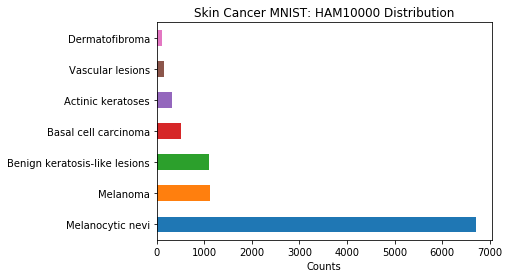

In [9]:
ax = dx_count_df.plot.barh(x='Diagnosis', y='Counts')
plt.title('Skin Cancer MNIST: HAM10000 Distribution')
ax.get_legend().remove()
ax.set_ylabel("")
ax.set_xlabel("Counts")
plt.show()

In [10]:
dx_count_df.insert(2, "Non-cancerous/Cancerous", ['Non-cancerous', 'Cancerous', 'Non-cancerous', 'Cancerous', 'Non-cancerous', 'Non-cancerous', 'Non-cancerous'], True) 

In [11]:
dx_count_df

,Diagnosis,Counts,Non-cancerous/Cancerous
0,Melanocytic nevi,6705,Non-cancerous
1,Melanoma,1113,Cancerous
2,Benign keratosis-like lesions,1099,Non-cancerous
3,Basal cell carcinoma,514,Cancerous
4,Actinic keratoses,327,Non-cancerous
5,Vascular lesions,142,Non-cancerous
6,Dermatofibroma,115,Non-cancerous


In [12]:
nc_c_count = dx_count_df.groupby('Non-cancerous/Cancerous')['Counts'].sum()
nc_c_count = pd.DataFrame(nc_c_count)

Text(0,0.5,'')

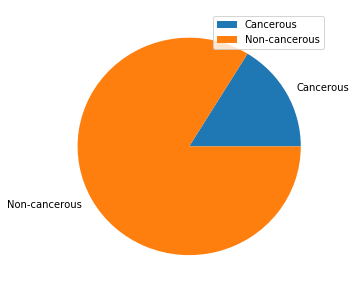

In [14]:
nc_c_count_plot = nc_c_count.plot.pie(y='Counts', figsize=(5, 5))
nc_c_count_plot.set_ylabel("")

Text(0.5,1,'Distribution of Age in the MNIST1000 Dataset')

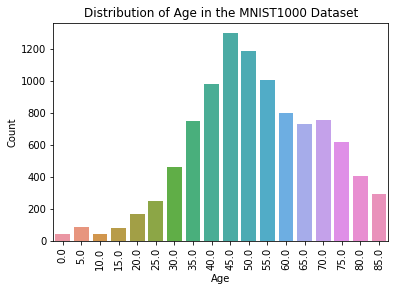

In [15]:
sns.countplot(x='age', data=skin_data)
plt.xticks(rotation = 90)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age in the MNIST1000 Dataset')

Text(0.5,1,'Distribution of Sex in the MNIST1000 Dataset')

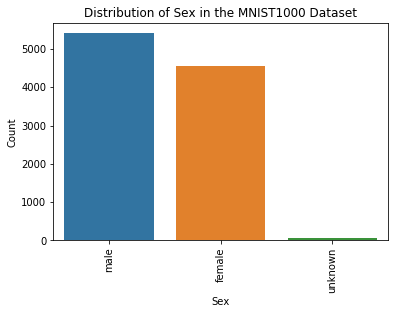

In [16]:
sns.countplot(x='sex', data=skin_data)
plt.xticks(rotation = 90)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Sex in the MNIST1000 Dataset')

**Skin Cancer and Age**
* Women age 49 are more likely to develop melanoma than any other cancer excluding breast and thyroid cancer
* Men age 49 are more likely to develop melanoma than any other cancer
* Men >= 50 are more likely to develop melanoma than women

In [74]:
mel = skin_data.loc[skin_data["dx"] == 'mel']
#Subset of dataframe for only melanoma diagnosis
mel = mel[['dx','age', 'sex']]

SyntaxError: invalid syntax (<ipython-input-74-55d1fceb7b43>, line 4)

In [86]:
mel_age_sex = mel.groupby(['age','sex']).size()
mel_age_sex.to_frame()

0
age  sex        
5.0  male      1
20.0 female    2
     male      4
25.0 female   12
     male      4
30.0 female   24
     male     10
35.0 female   23
     male     13
40.0 female   36
     male     13
45.0 female   35
     male     39
50.0 female   39
     male     57
55.0 female   51
     male     91
60.0 female   37
     male     69
65.0 female   41
     male     92
70.0 female   52
     male    114
75.0 female   24
     male     67
80.0 female   26
     male     59
85.0 female   22
     male     54

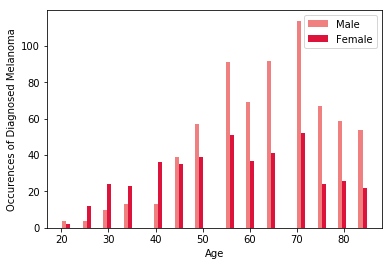

In [93]:
plt.hist([mel[mel['sex']=='male']['age'], mel[mel['sex']=='female']['age']], bins=30, label=['Male','Female'], color=("lightcoral", "crimson"))
plt.xlabel('Age')
plt.ylabel('Occurences of Diagnosed Melanoma')
plt.legend()

**Analysis of the influence of age and gender on melanoma**

As mentioned, women are more likely to develop melanoma age 49 than any other form of cancer (except breast and thryoid). Though there is no comparison to other cancers we can see that women age 40 and lower have a significantly higher chance of developing melanoma. However, after age 50 it is men that have a higher chance of developing melanoma. In fact at certain ages their chance at developing melanoma is nearly double that of women.

Text(0.5,1,'Localization of Lesions')

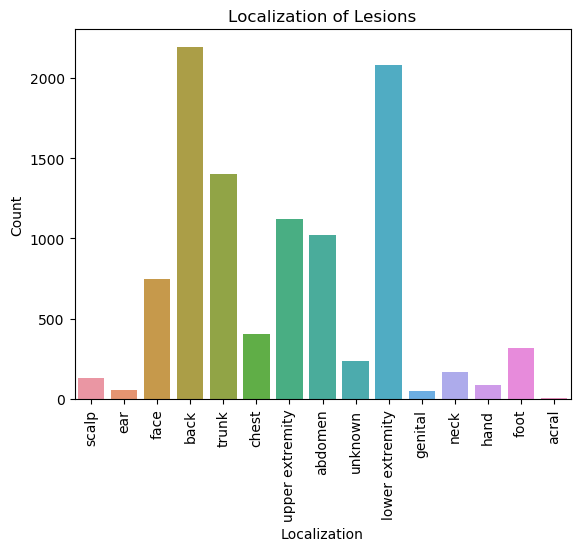

In [27]:
sns.countplot(x='localization', data=skin_data)
plt.xticks(rotation = 90)
plt.xlabel('Localization')
plt.ylabel('Count')
plt.title('Localization of Lesions')
#Common areas include back, lower extremity, and trunk

Text(0.5,1,'Method of Diagnosis')

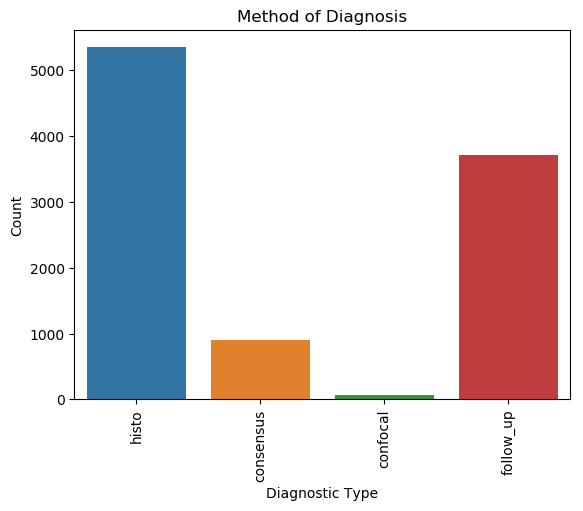

In [28]:
sns.countplot(x='dx_type', data=skin_data)
plt.xticks(rotation = 90)
plt.xlabel('Diagnostic Type')
plt.ylabel('Count')
plt.title('Method of Diagnosis')